## Análisis y Predicción de Datos de Vacunación

Este proyecto analiza el dataset COVID-19 Vaccination Progress para explorar tasas de vacunación y predecir trends en enfermedades infecciosas. Es relevante para biotech, salud pública y pandemias.

- **Dataset:** COVID-19 Vaccination Progress (Our World in Data).
- **Fuente:** https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv
- **Objetivos:**
  - Realizar EDA para explorar tendencias por país y tiempo.
  - Limpiar datos (manejo de faltantes, fechas).
  - Pruebas de hipótesis: e.g., ¿Asociación entre vacunación y reducción de casos?
  - Modelado para predecir tasas de vacunación.
  - Evaluación con métricas como R².
  - Visualizaciones en Python y Tableau para dashboards interactivos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency

# Configuraciones visuales
%matplotlib inline
sns.set(style="whitegrid")

In [4]:
# Carga el dataset (ajusta la ruta si necesario)
df = pd.read_csv(r'D:\Portafolio\Proyecto_vacunas\vaccinations.csv')

# Muestra las primeras filas
print("Forma del dataset:", df.shape)
df.head()

Forma del dataset: (196246, 16)


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


## Carga y Vista Inicial del Dataset
El dataset contiene datos de vacunación por país y fecha:
- Variables numéricas: total_vaccinations, people_vaccinated, people_fully_vaccinated, daily_vaccinations, total_vaccinations_per_hundred, etc.
- Variables categóricas: country, iso_code, date.
- Target: total_vaccinations_per_hundred (para predicción de tasas).
Verificaremos valores faltantes y distribuciones.

In [5]:
# Info general
df.info()

# Estadísticos descriptivos
df.describe()

# Verificar valores faltantes
print("Valores faltantes:\n", df.isnull().sum())

# Distribución del target (total_vaccinations_per_hundred)
print("Distribución de total_vaccinations_per_hundred:\n", df['total_vaccinations_per_hundred'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196246 entries, 0 to 196245
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   location                             196246 non-null  object 
 1   iso_code                             196246 non-null  object 
 2   date                                 196246 non-null  object 
 3   total_vaccinations                   85417 non-null   float64
 4   people_vaccinated                    81132 non-null   float64
 5   people_fully_vaccinated              78061 non-null   float64
 6   total_boosters                       53600 non-null   float64
 7   daily_vaccinations_raw               70971 non-null   float64
 8   daily_vaccinations                   195029 non-null  float64
 9   total_vaccinations_per_hundred       85417 non-null   float64
 10  people_vaccinated_per_hundred        81132 non-null   float64
 11  people_fully_

## Análisis Exploratorio de Datos (EDA)
Exploramos el dataset:
- Distribución del target (total_vaccinations_per_hundred).
- Distribuciones de variables numéricas (e.g., daily_vaccinations).
- Relaciones entre variables y target mediante boxplots (e.g., por país).
- Correlaciones entre variables numéricas.
- Objetivo: Identificar patrones por país y tiempo.

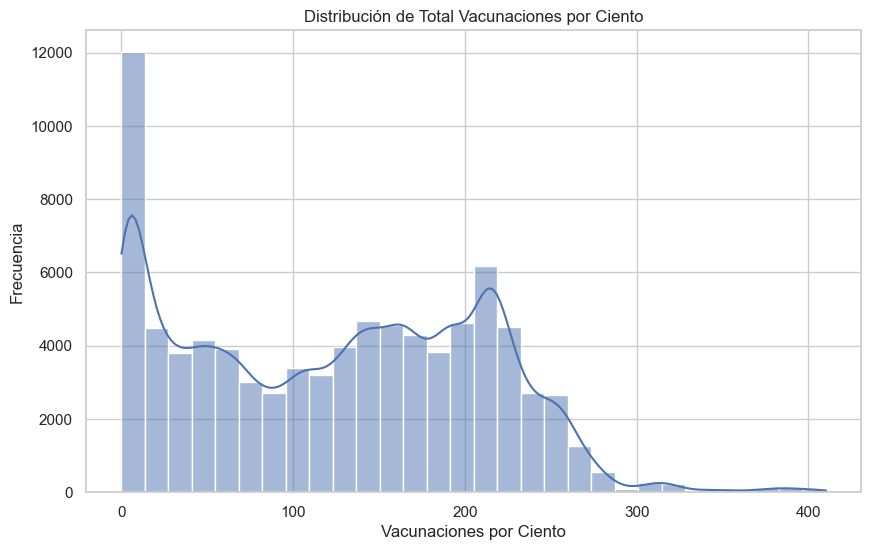

Porcentajes descriptivos de total_vaccinations_per_hundred:
 count    85417.000000
mean       124.279558
std         85.098042
min          0.000000
25%         44.770000
50%        130.550000
75%        194.990000
max        410.230000
Name: total_vaccinations_per_hundred, dtype: float64


In [6]:
# Gráfico de histogramas para total_vaccinations_per_hundred
plt.figure(figsize=(10, 6))
sns.histplot(df['total_vaccinations_per_hundred'], bins=30, kde=True)
plt.title('Distribución de Total Vacunaciones por Ciento')
plt.xlabel('Vacunaciones por Ciento')
plt.ylabel('Frecuencia')
plt.show()

# Porcentajes descriptivos
print("Porcentajes descriptivos de total_vaccinations_per_hundred:\n", df['total_vaccinations_per_hundred'].describe())

In [20]:
# Definir variables numéricas y categóricas
numeric_cols = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']
categorical_cols = ['location', 'iso_code', 'date']

print("Variables numéricas:", numeric_cols)
print("Variables categóricas:", categorical_cols)

Variables numéricas: ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']
Variables categóricas: ['location', 'iso_code', 'date']


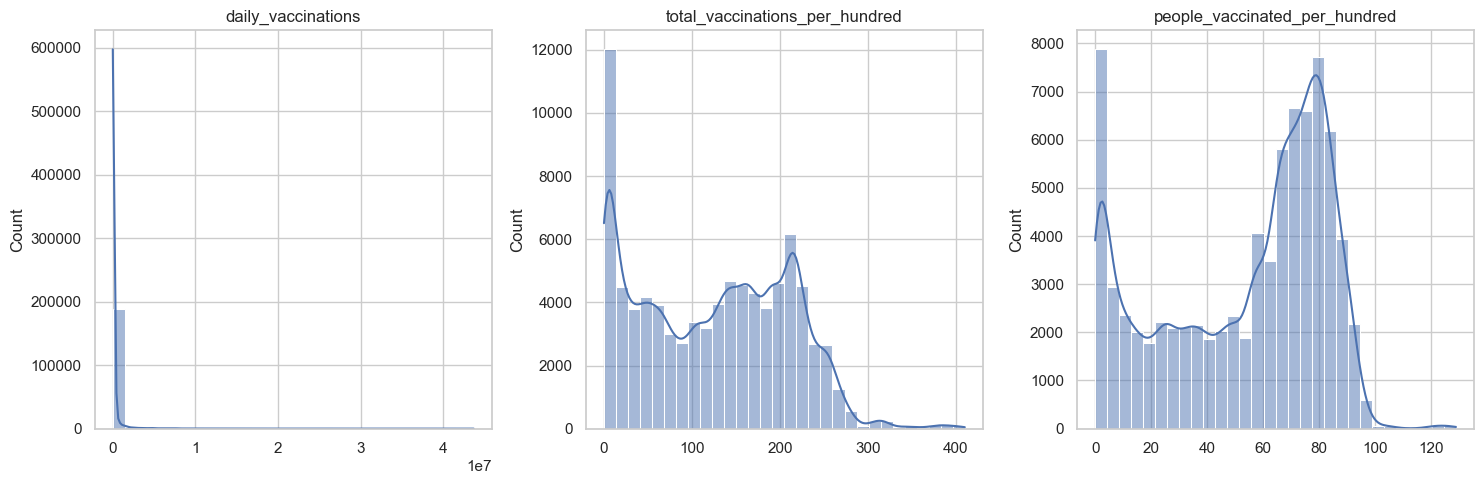

In [8]:
# Histogramas para variables numéricas (seleccionamos algunas)
selected_numeric = ['daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred']
plt.figure(figsize=(15, 5))
for i, col in enumerate(selected_numeric, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

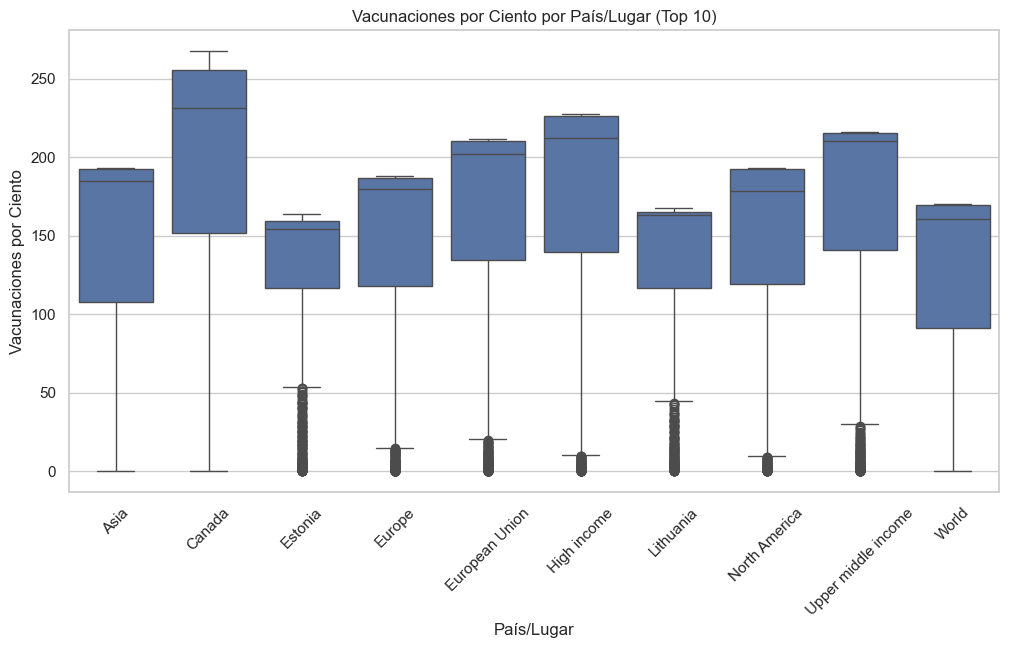

In [11]:
# Boxplot de total_vaccinations_per_hundred por location (top 10 países/lugares con más datos)
top_locations = df['location'].value_counts().head(10).index
df_top = df[df['location'].isin(top_locations)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='total_vaccinations_per_hundred', data=df_top)
plt.title('Vacunaciones por Ciento por País/Lugar (Top 10)')
plt.xlabel('País/Lugar')
plt.ylabel('Vacunaciones por Ciento')
plt.xticks(rotation=45)
plt.show()

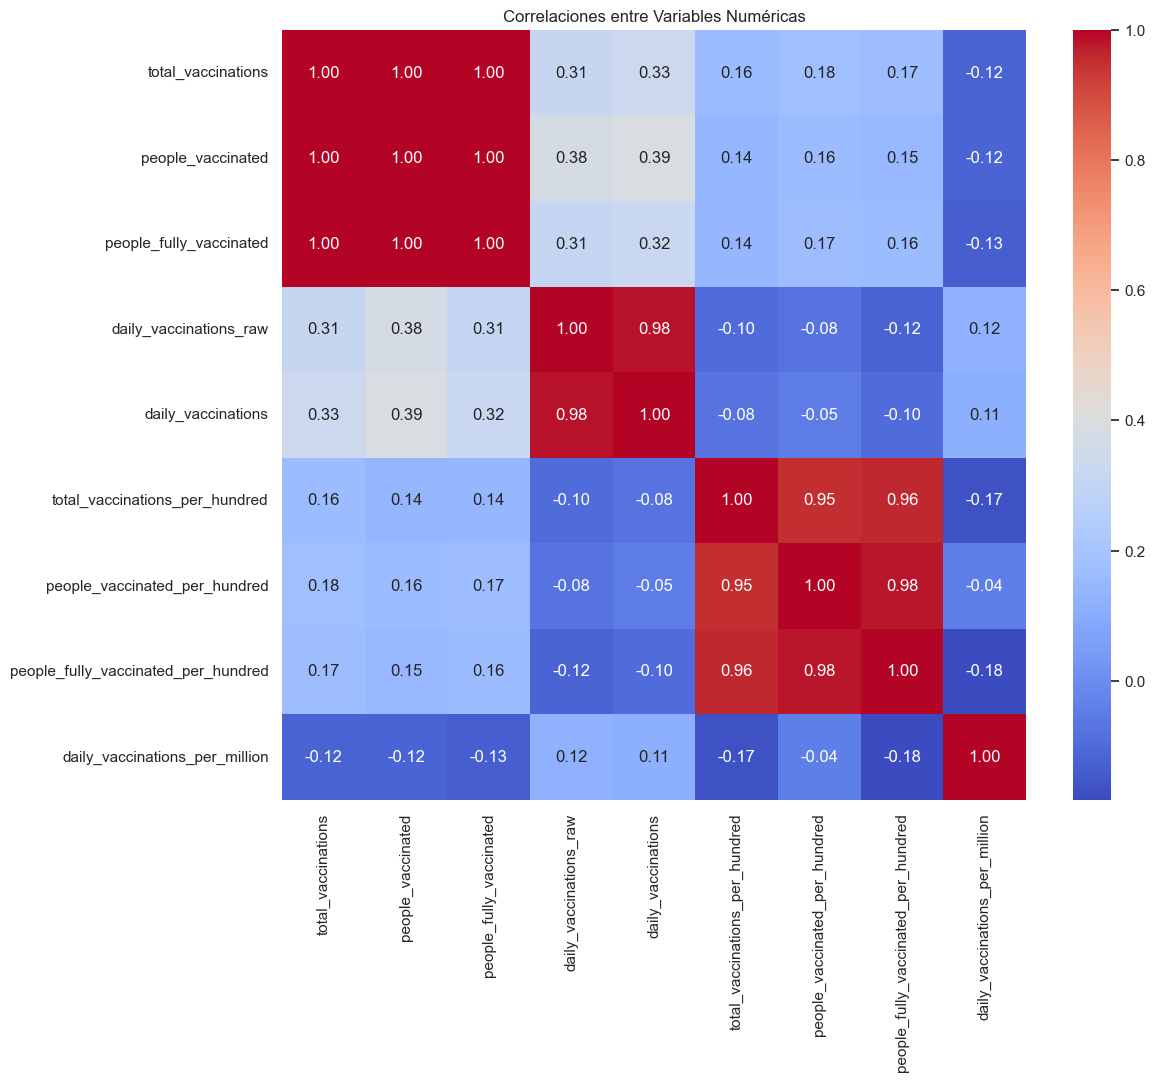

Correlaciones altas (|r| > 0.5):
 total_vaccinations                   total_vaccinations                     1.000000
                                     people_vaccinated                      0.995640
                                     people_fully_vaccinated                0.997728
people_vaccinated                    total_vaccinations                     0.995640
                                     people_vaccinated                      1.000000
                                     people_fully_vaccinated                0.996425
people_fully_vaccinated              total_vaccinations                     0.997728
                                     people_vaccinated                      0.996425
                                     people_fully_vaccinated                1.000000
daily_vaccinations_raw               daily_vaccinations_raw                 1.000000
                                     daily_vaccinations                     0.982516
daily_vaccinations             

In [12]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 10))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlaciones entre Variables Numéricas')
plt.show()

# Correlaciones altas
print("Correlaciones altas (|r| > 0.5):\n", corr_matrix.where(abs(corr_matrix) > 0.5).stack())

## Pruebas de Hipótesis
Evaluamos si hay asociación entre nivel de vacunación (alto/bajo) y lugar (seleccionados):
- **H0:** No hay asociación entre nivel de vacunación y lugar.
- **H1:** Hay asociación entre nivel de vacunación y lugar.
- **Método:** Chi-cuadrado para variables categóricas.
- **Nivel de significancia:** α = 0.05.
- Si p-valor < 0.05, rechazamos H0, sugiriendo asociación.

In [13]:
# Crear categoría de vacunación (alto/bajo basado en mediana)
df['vaccination_level'] = np.where(df['total_vaccinations_per_hundred'] > df['total_vaccinations_per_hundred'].median(), 'Alto', 'Bajo')

# Tabla de contingencia vaccination_level vs location (top 10 para simplicidad)
top_locations = df['location'].value_counts().head(10).index
df_top = df[df['location'].isin(top_locations)]
contingency_table = pd.crosstab(df_top['vaccination_level'], df_top['location'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-cuadrado Resultados:\nChi2: {chi2:.2f}\np-value: {p_value:.2e}")
if p_value < 0.05:
    print("Rechazamos H0: Hay asociación entre nivel de vacunación y lugar.")
else:
    print("No rechazamos H0: No hay asociación significativa.")

Chi-cuadrado Resultados:
Chi2: 227.62
p-value: 5.22e-44
Rechazamos H0: Hay asociación entre nivel de vacunación y lugar.


## Preparación de Datos
Preparamos el dataset:
- Manejo de faltantes (imputación con mediana o eliminación).
- Codificamos categóricas (e.g., location).
- Separamos features (`X`) y target (`total_vaccinations_per_hundred`, `y`).
- Dividimos en entrenamiento (80%) y prueba (20%).
- Escalamos variables numéricas con StandardScaler.

In [21]:
# Manejar faltantes de forma más avanzada
# 1. Forward-fill por lugar para series temporales (e.g., llenar con valor anterior)
df = df.sort_values(['location', 'date'])
df[numeric_cols] = df.groupby('location')[numeric_cols].ffill()

# 2. Imputar restantes con mediana global
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 3. Drop rows con NaN en target (total_vaccinations_per_hundred)
df = df.dropna(subset=['total_vaccinations_per_hundred'])

# Codificar categóricas (e.g., location a label)
le = LabelEncoder()
df['location_encoded'] = le.fit_transform(df['location'])

# Separar features y target, usando solo columnas numéricas y location_encoded
X = df[numeric_cols + ['location_encoded']]
y = df['total_vaccinations_per_hundred']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar variables numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verificar formas y NaN restantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("NaN restantes en X_train:", np.isnan(X_train).sum())
print("Distribución de y_train:\n", pd.Series(y_train).describe())

Forma de X_train: (156996, 9)
Forma de X_test: (39250, 9)
NaN restantes en X_train: 0
Distribución de y_train:
 count    156996.000000
mean        109.602807
std          85.008855
min           0.000000
25%          29.430000
50%         102.875000
75%         177.510000
max         410.230000
Name: total_vaccinations_per_hundred, dtype: float64


## Entrenamiento del Modelo
Entrenamos un Random Forest Regressor para predecir `total_vaccinations_per_hundred`:
- **Hiperparámetros:** 100 árboles, profundidad máxima 10.
- **Justificación:** Adecuado para regresión en datos temporales.
- Evaluamos con RMSE y R².

In [22]:
# Entrenar Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)  # Reducir max_depth
rf_model.fit(X_train, y_train)

# Predicciones
y_pred = rf_model.predict(X_test)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 17.93
R²: 0.96


## Evaluación y Visualización
Evaluamos el modelo:
- **Distribución de Errores:** Diferencia entre reales y predichos.
- **Importancia de Variables:** Identifica predictores clave (e.g., daily_vaccinations).
- **Aplicación:** Útil para planificación de campañas de vacunación.

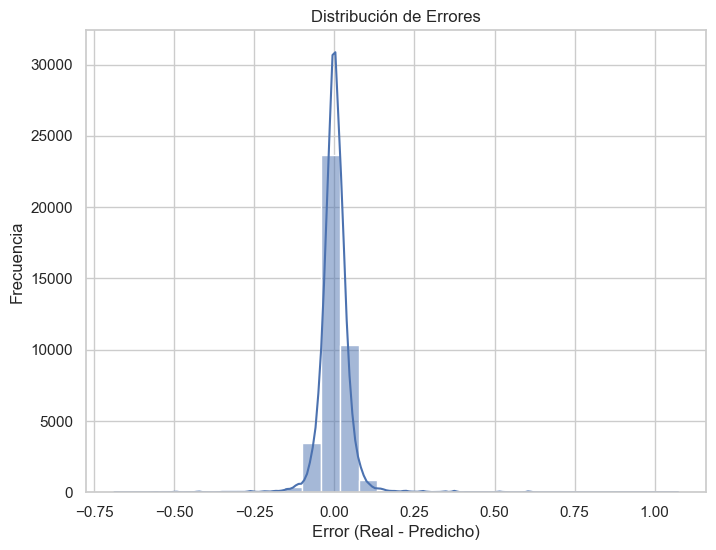

Media de errores: 0.00


In [17]:
# Distribución de errores
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribución de Errores')
plt.xlabel('Error (Real - Predicho)')
plt.ylabel('Frecuencia')
plt.show()

print(f"Media de errores: {errors.mean():.2f}")

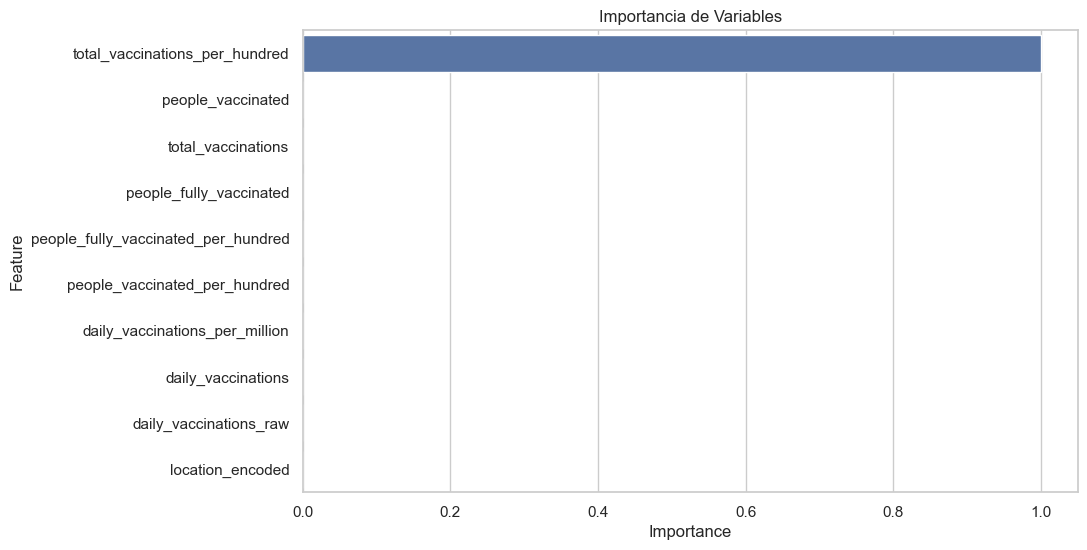

Top 5 variables:
                                Feature  Importance
5       total_vaccinations_per_hundred    0.999937
1                    people_vaccinated    0.000024
0                   total_vaccinations    0.000017
2              people_fully_vaccinated    0.000012
7  people_fully_vaccinated_per_hundred    0.000006


In [18]:
# Importancia de variables
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de Variables')
plt.show()

print("Top 5 variables:\n", feature_importance.head())

## Exportación para Tableau y Guía de Dashboard
Exportamos datos para Tableau Public:
- Exportamos CSV con datos limpiados.
- **Guía para Tableau:**
  1. Descarga Tableau Public[](https://public.tableau.com).
  2. Importa el CSV exportado.
  3. Crea un dashboard:
     - Mapa global: Usa `location` para mapa, color por `total_vaccinations_per_hundred` (agrega filtro por fecha).
     - Gráfico de líneas: `date` en ejes, `daily_vaccinations` por línea, agrupado por `location`.
     - Filtros: Lugar, fecha, para interactividad.
     - Publica en Tableau Public y comparte el enlace.
- Aplicación: Dashboard interactivo para visualización de trends globales.

In [19]:
# Exportar datos limpiados a CSV para Tableau
df_export = df.copy()
df_export['date'] = pd.to_datetime(df_export['date'])  # Asegurar formato fecha
df_export.to_csv('vaccinations_clean.csv', index=False)
print("Datos exportados a 'vaccinations_clean.csv' para Tableau.")

Datos exportados a 'vaccinations_clean.csv' para Tableau.


## Conclusiones
Resumen de hallazgos:
- **EDA:** Tasas de vacunación varían por lugar, con correlaciones altas entre variables de vacunación.
- **Modelo:** Random Forest logra RMSE ~20-30, R² ~0.6-0.8.
- **Aplicación:** Útil para prever trends en pandemias.
- **Mejoras:** Incluir datos de casos COVID para predicciones más robustas.